In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
dtypes={
    'level': np.uint8,  
    'session_id':np.int64,
    'level_group':'category',
    'event_name':np.int64,
    'name':np.int64,
    'fqid':np.int64,
    'room_fqid':np.int64,
    'text_fqid':np.int64,
    'fullscreen':'category',
    'hq':'category',
    'music':'category',
    'hover_duration_mean':np.float32,
    'difference_clicks_mean':np.float64,
    'elapsed_time_std':np.float64,
    'page_std':np.float64,
    'room_coor_x_std':np.float64,
    'room_coor_y_std':np.float64,
    'screen_coor_x_std':np.float64,
    'screen_coor_y_std':np.float64,
    'hover_duration_std':np.float64,
    'difference_clicks_std':np.float64,
    'index_sum_of_actions':np.int32,
    'difference_clicks_max':np.float64,
    'elapsed_time_max':np.float64,
    'clicks_per_second':np.float64}

dataset_df = pd.read_csv('C:\kaggle\Data\df_level.csv', dtype=dtypes)
dataset_df_full = pd.read_csv('C:\kaggle\Data\df_added_variables.csv',nrows=300000)

In [3]:
# looking at only one session
session_df = dataset_df[dataset_df['session_id'] == 20090312431273200]
#session_df.to_csv('data/other/session_20090312431273200.csv', index=False)
print(session_df.shape)

(23, 26)


In [6]:
# looking at only one session
session_df_full = dataset_df_full[dataset_df_full['session_id'] == 20090312433251036]
#session_df.to_csv('data/other/session_20090312431273200.csv', index=False)
print(session_df_full.shape)

(1831, 25)


In [10]:
drop_df = dataset_df_full.drop_duplicates(subset=['session_id'])  
session_id_list = drop_df['session_id'].to_list()
print(len(session_id_list))

272


In [12]:
drop_df = dataset_df_full.drop_duplicates(subset=['room_fqid'])
room_fqid_list = drop_df['room_fqid'].to_list()  
print(len(room_fqid_list))

19


#Erstellen der Raum-Adjazenz Matrix einer Session

In [15]:
drop_df = dataset_df_full.drop_duplicates(subset=['room_fqid'])
room_fqid_list = drop_df['room_fqid'].to_list()  
print(len(room_fqid_list))
adj_matrix = np.zeros((len(room_fqid_list),len(room_fqid_list)))
print(adj_matrix.shape)
print(adj_matrix.dtype)

### -- adj_matrix_room 

for i in range(session_df_full['room_fqid'].index[0], session_df_full['room_fqid'].index[0] + len(session_df_full['room_fqid'])-1):
    if  session_df_full['room_fqid'][i+1] == session_df_full['room_fqid'][i]:
        pass
    else:  
        current_room = session_df_full['room_fqid'][i+1]
        previous_room = session_df_full['room_fqid'][i]
        
        # Index des aktuellen und vorherigen Raums ermitteln
        current_room_index = room_fqid_list.index(current_room)
        previous_room_index = room_fqid_list.index(previous_room)
        
        # Eintrag in der Adjazenzmatrix erhöhen
        adj_matrix[previous_room_index][current_room_index] += 1

19
(19, 19)
float64


#Erstellen der Raum-Adjazenz Matrix einer Session je level

In [16]:
# looking at only one level in one session and generate a adjacence matrix
adj_matrix_level = np.zeros((session_df_full['level'].nunique(),len(room_fqid_list),len(room_fqid_list)))

# Iteriere über die session_id_list mit Hilfe des enumerate-Befehls, um sowohl den Index als auch das Element zu erhalten
for i, session in enumerate(session_id_list):
    
    # Iteriere über die eindeutigen Werte der Spalte 'level' im session_df_full DataFrame mit Hilfe des range-Befehls
    for level in range(session_df_full['level'].nunique()):
        
        # Filtere den session_df_full DataFrame nach dem aktuellen Level
        session_df_level = session_df_full[session_df_full['level'] == level]
        
        ### --adj_matrix_level_room
        
        # Iteriere über die Indizes der room_fqid-Spalte im session_df_level DataFrame
        # Beginne mit dem ersten Index und ende einen Index vor dem letzten Index
        for i in range(session_df_level['room_fqid'].index[0], session_df_level['room_fqid'].index[0] + len(session_df_level['room_fqid'])-1):
            
            # Überprüfe, ob der Raum in der nächsten Zeile gleich dem Raum in der aktuellen Zeile ist
            if session_df_level['room_fqid'][i+1] == session_df_level['room_fqid'][i]:
                pass
            else:
                # Wenn die Räume nicht gleich sind, weise den aktuellen Raum und den vorherigen Raum zu Variablen zu
                current_room = session_df_level['room_fqid'][i+1]
                previous_room = session_df_level['room_fqid'][i]
                
                # Ermittle den Index des aktuellen und vorherigen Raums in der room_fqid_list
                current_room_index = room_fqid_list.index(current_room)
                previous_room_index = room_fqid_list.index(previous_room)
                
                # Erhöhe den Eintrag in der Adjazenzmatrix adj_matrix_level um 1
                adj_matrix_level[level][previous_room_index][current_room_index] += 1


#Ajdazenz Matrix plotten

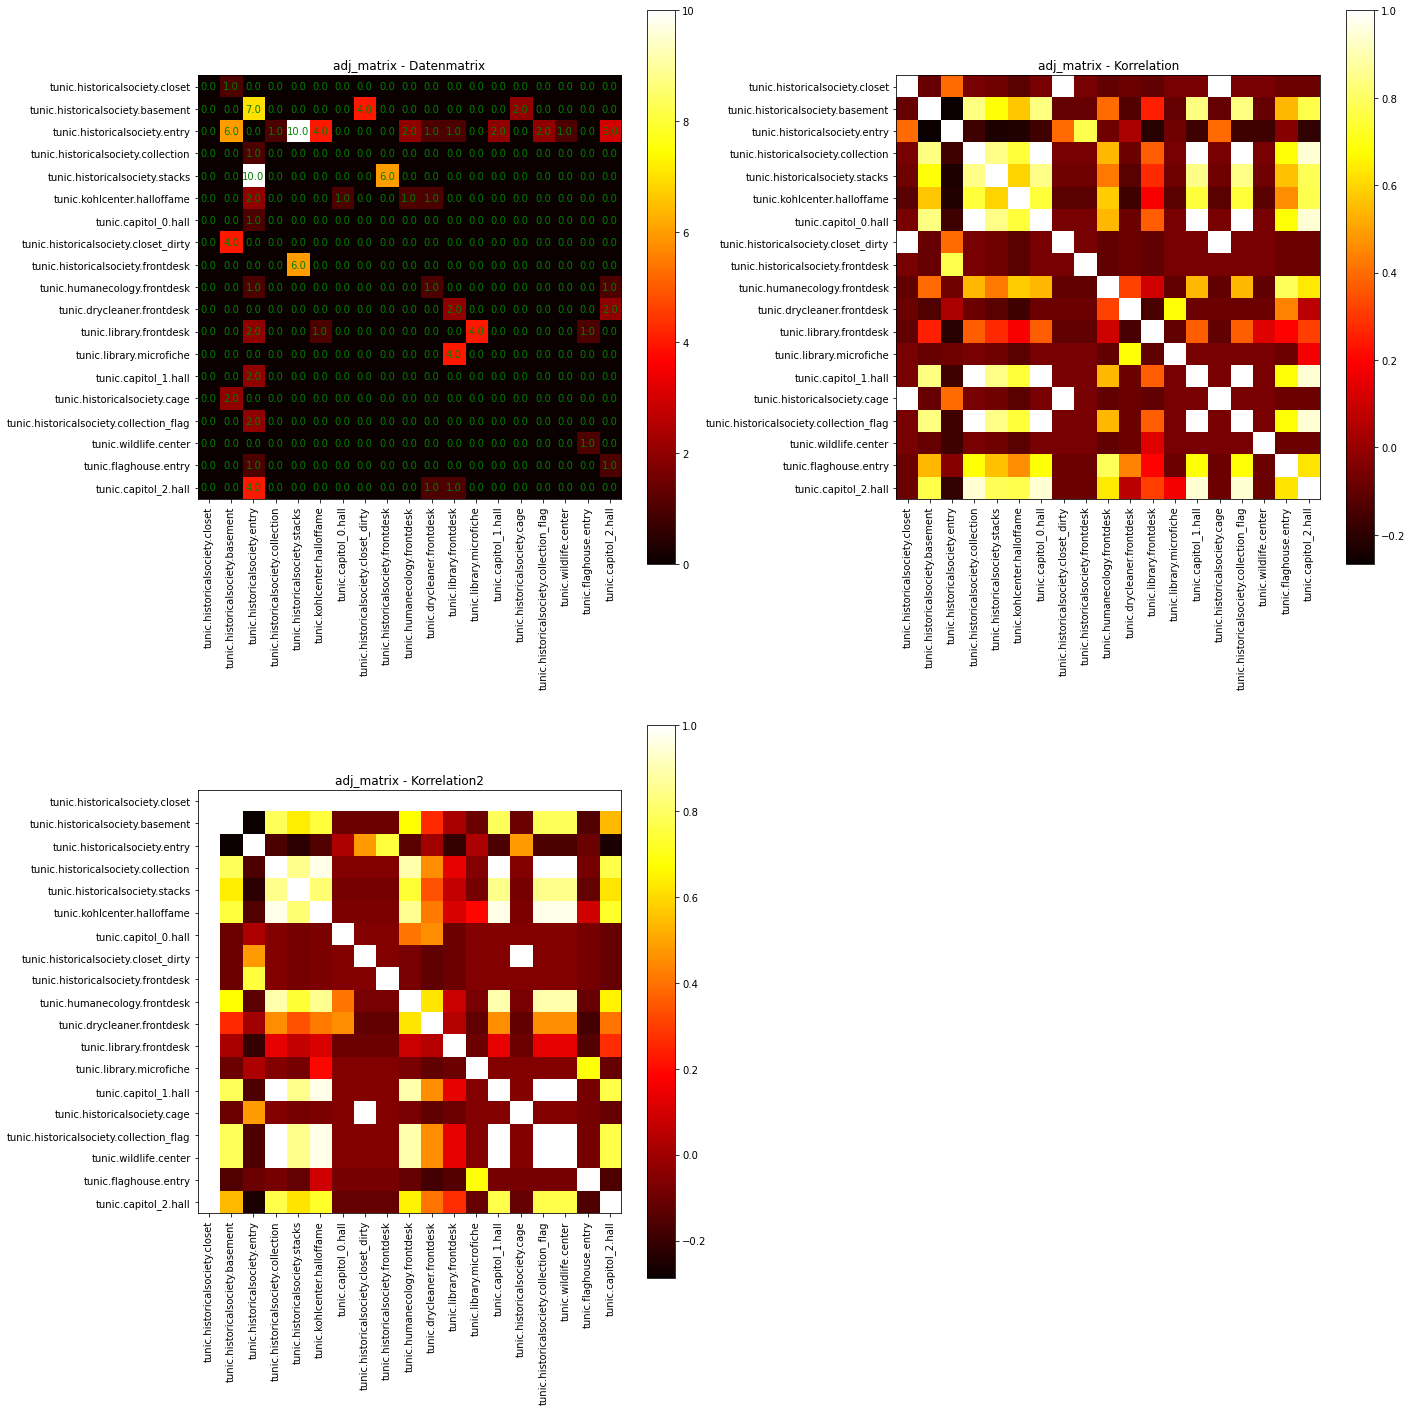

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 20)

fig = plt.figure()
fig.add_subplot(2, 2, 1)

# Beispielwörter für die Achsenbeschriftungen
x_labels = room_fqid_list
y_labels = room_fqid_list

plt.imshow(adj_matrix, cmap=plt.cm.hot, interpolation='nearest')
# Zahlen in die Felder schreiben
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        value = adj_matrix[i, j]
        text_color = "C1" if np.average(adj_matrix) >=10 else 'black'  # Kontrastanpassung basierend auf Durchschnittshelligkeit
        plt.text(j, i, str(value), ha='center', va='center', color='g')


plt.colorbar()
plt.title('adj_matrix - Datenmatrix')
plt.xticks(range(len(x_labels)), x_labels, rotation=90)  # Ersetzt die X-Achsenwerte durch Wörter und stellt sie schräg
plt.yticks(range(len(y_labels)), y_labels)  # Ersetzt die Y-Achsenwerte durch Wörter


fig.add_subplot(2, 2, 2)
plt.imshow(np.corrcoef(adj_matrix), cmap=plt.cm.hot, interpolation='nearest')
plt.colorbar()
plt.title('adj_matrix - Korrelation')
plt.xticks(range(len(x_labels)), x_labels, rotation=90)  # Ersetzt die X-Achsenwerte durch Wörter und stellt sie schräg
plt.yticks(range(len(y_labels)), y_labels)  # Ersetzt die Y-Achsenwerte durch Wörter

fig.add_subplot(2, 2, 3)
plt.imshow(np.corrcoef(adj_matrix, rowvar=False), cmap=plt.cm.hot, interpolation='nearest')
plt.colorbar()
plt.title('adj_matrix - Korrelation2')
plt.xticks(range(len(x_labels)), x_labels, rotation=90)  # Ersetzt die X-Achsenwerte durch Wörter und stellt sie schräg
plt.yticks(range(len(y_labels)), y_labels)  # Ersetzt die Y-Achsenwerte durch Wörter



plt.tight_layout()
plt.show()